<IPython.core.display.Javascript object>


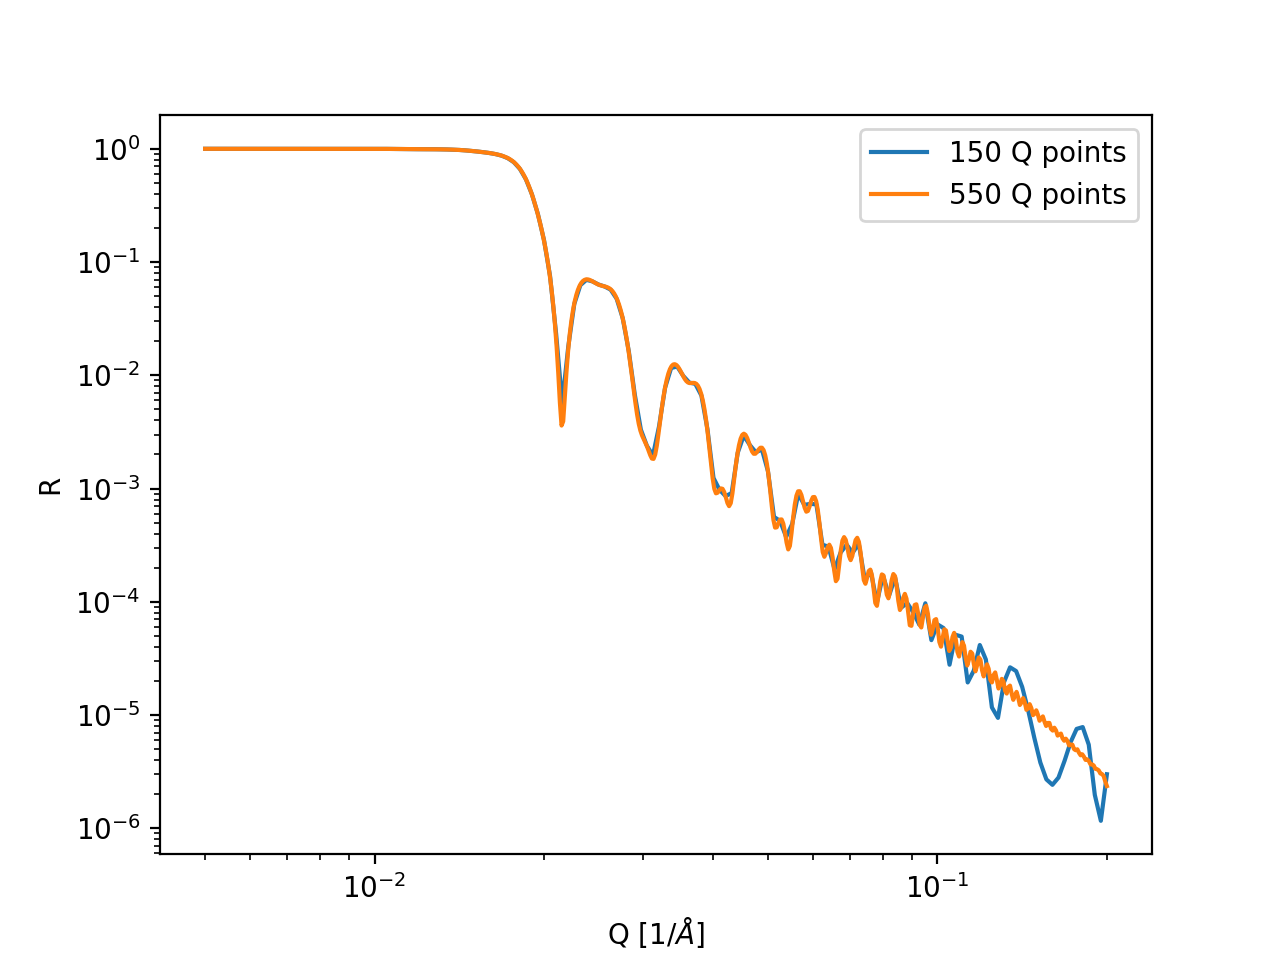

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib notebook 

import refl1d
from refl1d.names import *

q1 = np.logspace(np.log10(0.005), np.log10(0.2), num=150)
dq1 = 0.02*q1/2.35

q2 = np.logspace(np.log10(0.005), np.log10(0.2), num=550)
dq2 = 0.02*q2/2.35
zeros = np.zeros(len(q))

probe1 = QProbe(q1, dq1, data=(zeros, zeros))
probe2 = QProbe(q2, dq2, data=(zeros, zeros))


sample = Slab(material=SLD(name='Si', rho=2.07), interface=0.3)
sample = sample | Slab(material=SLD(name='SiOx', rho=3.2), thickness=15, interface=0.8)
sample = sample | Slab(material=SLD(name='hPS', rho=1.4), thickness=1100, interface=25)
sample = sample | Slab(material=SLD(name='dPS', rho=6), thickness=500, interface=4)
sample = sample | Slab(material=SLD(name='air', rho=0))

probe.background = Parameter(value=0, name='background')
expt1 = Experiment(probe=probe1, sample=sample)
expt2 = Experiment(probe=probe2, sample=sample)

q1, r1 = expt1.reflectivity()
q2, r2 = expt2.reflectivity()

ax = plt.figure()
plt.plot(q1, r1, label='150 Q points')
plt.plot(q2, r2, label='550 Q points')
plt.gca().legend()
plt.xlabel('Q [$1/\AA$]')
plt.ylabel('R')
plt.xscale('log')
plt.yscale('log')

plt.show()
